In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams

params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
env = JaywalkEnv(params)

In [3]:
from src.agents.reinforce.reinforce_agent import REINFORCEAgent


agents = []
training_results = []

for lr in [3e-3, 3e-4, 3e-5]:
    train_parameters = {
        "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
        "action_dim": 3,
        "action_space": [0, 1, 2],
        "hidden_dim": 64,
        "gamma": 0.99,
        "episodes": 100_000,
        "learning_rate": lr,
        "timeout": 200,
        "device": "cpu",
    }

    agent = REINFORCEAgent(env, train_parameters)
    result = agent.train(train_parameters["episodes"])

    filename = f"../checkpoints/reinforce_hyperparameter/reinforce_lr_{lr:.0e}.pt"
    agent.save(filename)

    agents.append(agent)
    training_results.append(result)

Episode: 99999 | Return: 84.55 | Loss: -17031.73: 100%|██████████| 100000/100000 [05:09<00:00, 322.75it/s]


Model and optimizer states saved to ../checkpoints/reinforce_hyperparameter/reinforce_lr_3e-03.pt


Episode: 99999 | Return: -51.49 | Loss: 10294.39: 100%|██████████| 100000/100000 [05:06<00:00, 326.69it/s]


Model and optimizer states saved to ../checkpoints/reinforce_hyperparameter/reinforce_lr_3e-04.pt


Episode: 99999 | Return: -51.49 | Loss: 5733.97: 100%|██████████| 100000/100000 [06:08<00:00, 271.23it/s]


Model and optimizer states saved to ../checkpoints/reinforce_hyperparameter/reinforce_lr_3e-05.pt


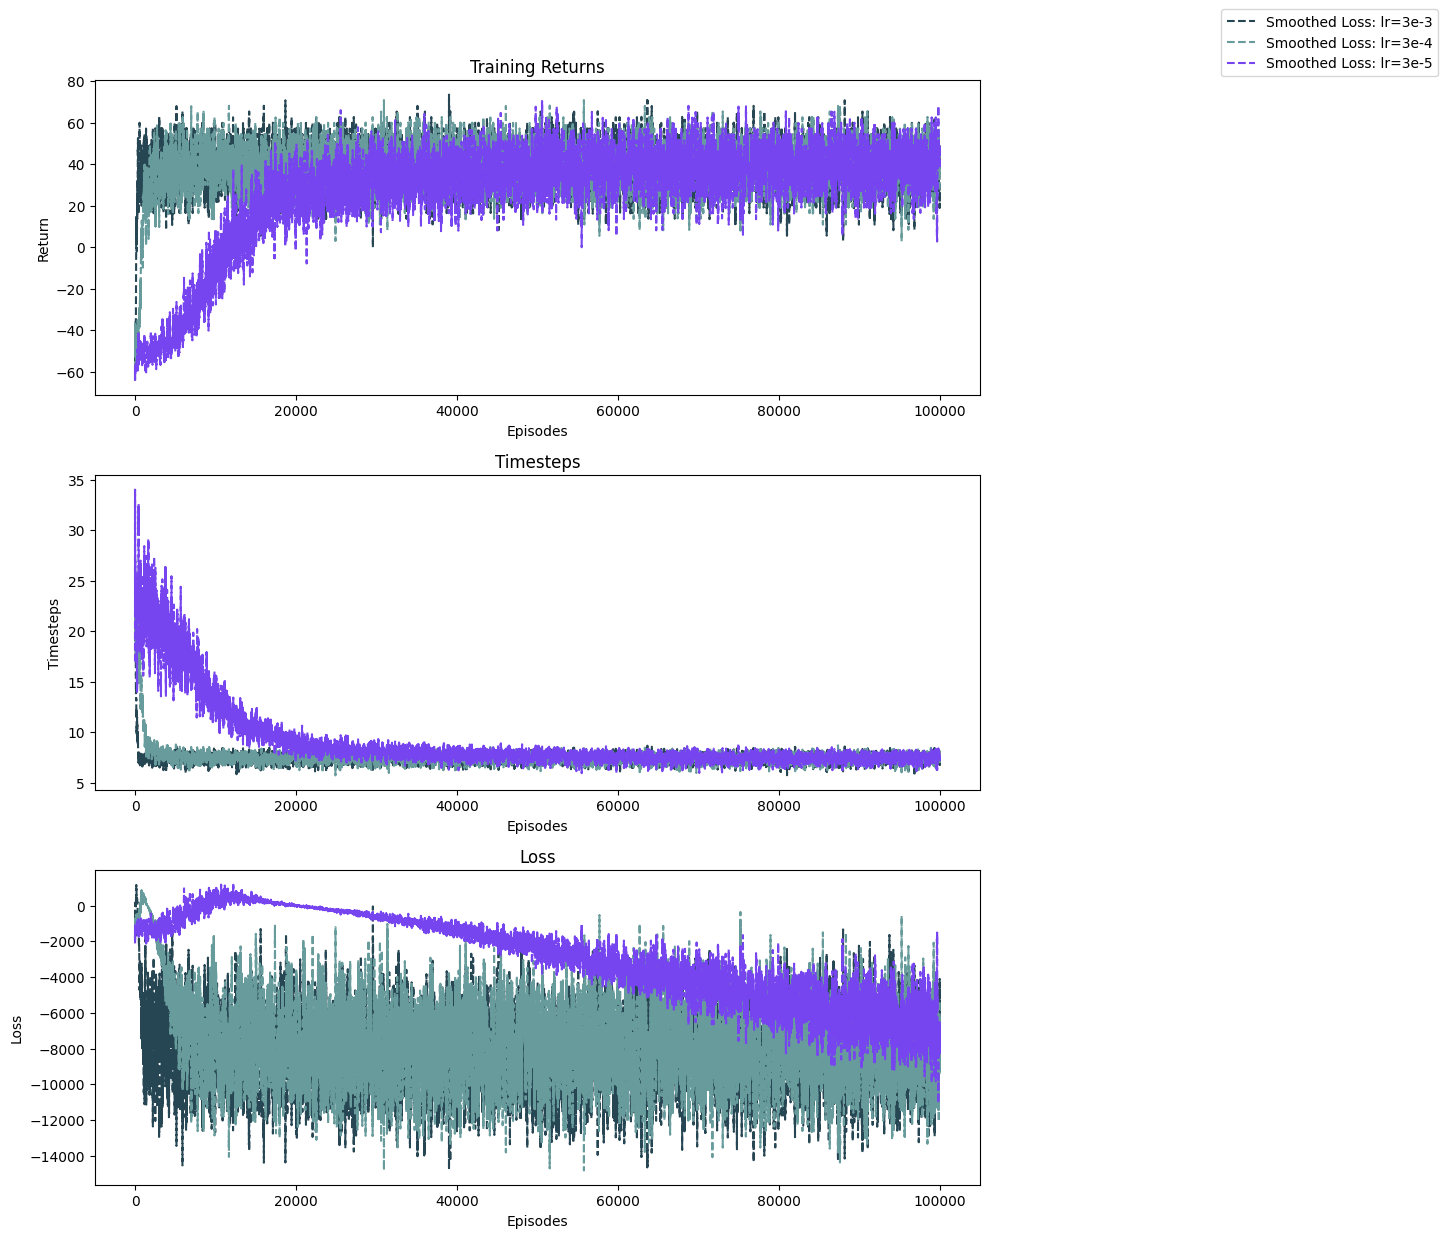

In [4]:
REINFORCEAgent.plot_multiple_training_result(
    training_results=training_results,
    hyperparams=[
        "lr=3e-3",
        "lr=3e-4",
        "lr=3e-5",
    ],
)